In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
from glob import glob

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy


In [3]:
path=pathlib.Path(r"E:\HAR\emirhan_human_dataset\datasets\human_data\train_data")

In [4]:
calling=list(path.glob("calling/*"))
clapping=list(path.glob("clapping/*"))
cycling=list(path.glob("cycling/*"))
dancing=list(path.glob("dancing/*"))
drinking=list(path.glob("drinking/*"))
eating=list(path.glob("eating/*"))
fighting=list(path.glob("fighting/*"))
hugging=list(path.glob("hugging/*"))
laughing=list(path.glob("laughing/*"))
listening_to_music=list(path.glob("listening_to_music/*"))
running=list(path.glob("running/*"))
sitting=list(path.glob("sitting/*"))
sleeping=list(path.glob("sleeping/*"))
using_laptop=list(path.glob("using_laptop/*"))
texting=list(path.glob("texting/*"))

In [5]:
len(calling),len(clapping)

(1000, 1000)

In [6]:
action_dict={"calling":calling,"clapping":clapping,"cycling":cycling,"dancing":dancing,"drinking":drinking,"eating":eating,"fighting":fighting,"hugging":hugging,"laughing":laughing,"listening_to_music":listening_to_music,"running":running,"sitting":sitting,"sleeping":sleeping,"using_laptop":using_laptop,"texting":texting}

action_class={"calling":0,"clapping":1,"cycling":2,"dancing":3,"drinking":4,"eating":5,"fighting":6,"hugging":7,"laughing":8,"listening_to_music":9,"running":10,"sitting":11,"sleeping":12,"using_laptop":13,"texting":14}

In [7]:
x=[]
y=[]
for i in action_dict:
  action_name=i
  action_path_list =action_dict[action_name]
  for j in action_path_list:
    img=cv2.imread(str(j))
    # normalizedImg = np.zeros((800, 800))
    # normalizedImg = cv2.normalize(img,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
    # cv2.imshow('dst_rt', normalizedImg)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # print(img)
    try:
      img = cv2.resize(img, (150,150), interpolation=cv2.INTER_AREA)
      # print(img.shape)
    except:
      break
    height, width , layers = img.shape
    size=(width,height)
    # print(size)
  #  img=cv2.resize(img,(100,100))
    # img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=img/255
    
    
    
    x.append(img)
    cls=action_class[action_name]
    y.append(cls)

In [8]:
len(x),len(y)

(15000, 15000)

In [9]:
x=np.array(x)
y=np.array(y)

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=1)

In [11]:
xtrain.shape

(12000, 150, 150, 3)

In [12]:
xtest.shape

(3000, 150, 150, 3)

In [13]:
len(xtrain),len(xtest)

(12000, 3000)

In [14]:
len(ytrain),len(ytest)

(12000, 3000)

In [20]:
# model=Sequential()

In [21]:
# model.add(Conv2D(filters=100,input_shape=(150,150,3),kernel_size=(3,3),activation="relu",strides=1,padding='same'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=250,kernel_size=(3,3),activation='relu',strides=1,padding='same'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(200,activation='relu'))
# model.add(Dense(15,activation='softmax'))

In [22]:
# model.summary()

In [23]:
# model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [24]:
# hist=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=15,batch_size=70)

In [25]:
# model.save("MainProject.h5")

In [26]:
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomZoom
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [27]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [28]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential([
  data_augmentation,
  # layers.Rescaling(1./255),
  layers.Conv2D(50, (3,3), padding='valid', activation='relu',input_shape=(150,150,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(50, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Conv2D(64, (3,3), padding='valid', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Conv2D(30, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.7),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(80, activation='relu'),
  # layers.Dense(30, activation='relu'),
  # layers.Dense(30, activation='relu'),
  layers.Dense(50, activation='relu'),
  layers.Dense(15, name="outputs",activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 50)      1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 30)       

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50)

In [ ]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [34]:
hist=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=100,verbose=1,callbacks=es)

Epoch 1/50
120/120 [==============================] - 281s 2s/step - loss: 2.6006 - accuracy: 0.1261 - val_loss: 2.4727 - val_accuracy: 0.1750
Epoch 2/50
120/120 [==============================] - 218s 2s/step - loss: 2.3836 - accuracy: 0.2064 - val_loss: 2.3749 - val_accuracy: 0.2460
Epoch 3/50
120/120 [==============================] - 211s 2s/step - loss: 2.2833 - accuracy: 0.2473 - val_loss: 2.3847 - val_accuracy: 0.2537
Epoch 4/50
120/120 [==============================] - 211s 2s/step - loss: 2.2006 - accuracy: 0.2828 - val_loss: 2.1423 - val_accuracy: 0.3017
Epoch 5/50
120/120 [==============================] - 207s 2s/step - loss: 2.1732 - accuracy: 0.2887 - val_loss: 2.1838 - val_accuracy: 0.3027
Epoch 6/50
120/120 [==============================] - 206s 2s/step - loss: 2.1350 - accuracy: 0.3037 - val_loss: 2.1949 - val_accuracy: 0.2937
Epoch 7/50
120/120 [==============================] - 205s 2s/step - loss: 2.1008 - accuracy: 0.3153 - val_loss: 2.0626 - val_accuracy: 0.3273

In [49]:
model.save("MainProject.h5")

In [50]:
hist1=hist.history

In [51]:

# hist1

{'loss': [2.6006386280059814,
  2.3835647106170654,
  2.283259391784668,
  2.2006309032440186,
  2.173241138458252,
  2.135014295578003,
  2.1007964611053467,
  2.0622308254241943,
  2.020336627960205,
  2.0022411346435547,
  1.9791691303253174,
  1.9635169506072998,
  1.9287434816360474,
  1.9108045101165771,
  1.8981313705444336,
  1.860639214515686,
  1.860320806503296,
  1.8401087522506714,
  1.8184998035430908,
  1.7975761890411377,
  1.7921805381774902,
  1.7792282104492188,
  1.759066104888916,
  1.7538131475448608,
  1.7341850996017456,
  1.7105664014816284,
  1.71197509765625,
  1.7225738763809204,
  1.6770634651184082,
  1.671085000038147,
  1.6693097352981567,
  1.6519876718521118,
  1.639431118965149,
  1.6416741609573364,
  1.6192257404327393,
  1.6268199682235718,
  1.6128053665161133,
  1.6048917770385742,
  1.5879656076431274,
  1.588179349899292,
  1.5790499448776245,
  1.566252589225769,
  1.546191692352295,
  1.5449451208114624,
  1.540523648262024,
  1.5474656820297

In [38]:
# model.save("MainProject.h5")

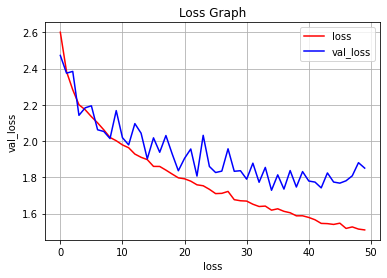

In [52]:
plt.plot(hist1['loss'],label="loss",color="r")
plt.plot(hist1['val_loss'],label="val_loss",color="b")
plt.title("Loss Graph")
plt.xlabel("loss")
plt.ylabel("val_loss")
plt.legend()
plt.grid()

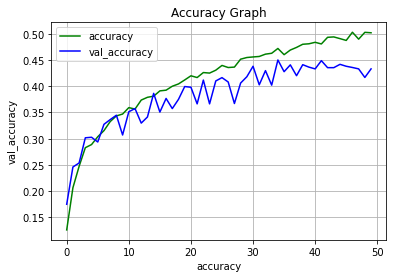

In [53]:
plt.plot(hist1['accuracy'],label="accuracy",color="g")
plt.plot(hist1['val_accuracy'],label="val_accuracy",color="b")
plt.title("Accuracy Graph")
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.legend()
plt.grid()

In [54]:
from sklearn.metrics import confusion_matrix
y_pred=np.argmax(model.predict(xtest),axis=-1)

94/94 [==============================] - 16s 165ms/step


In [55]:
cm=confusion_matrix(ytest,y_pred)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

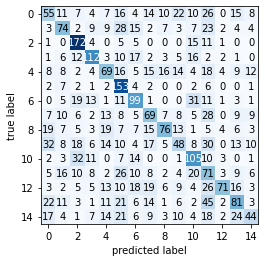

In [56]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm)

In [ ]:
import cv2
import tensorflow as tf

In [57]:
import cv2
import numpy as np
#new model to number array format
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [58]:
model=load_model("MainProject.h5")

In [59]:
labels={"calling":0,"clapping":1,"cycling":2,"dancing":3,"drinking":4,"eating":5,"fighting":6,"hugging":7,"laughing":8,"listening_to_music":9,"running":10,"sitting":11,"sleeping":12,"texting":13,"using_laptop":14}

In [63]:
def predict(img_path):
    img=load_img(str(img_path),target_size=(150,150))
    plt.imshow(img)
    img=img_to_array(img)
    img=img/255
    img=img.reshape(1,150,150,3)
    result=model.predict(img)
    for i in labels:
        if(np.argmax(result)==labels[i]):
            print(i)

1/1 [==============================] - 0s 219ms/step
using_laptop


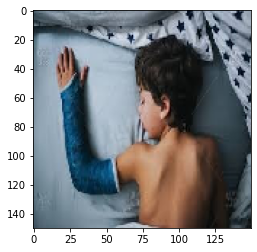

In [64]:
predict(r"C:\Users\User\Downloads\archive (1)\Human Action Recognition\test\Image_1.jpg")

1/1 [==============================] - 0s 28ms/step
cycling


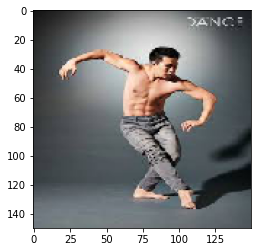

In [65]:
predict(r"E:\HAR\emirhan_human_dataset\datasets\human_data\test_data\dancing\images_085 (2).jpg")